In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import scipy.stats as linregress
import seaborn as sns
from pandas import IndexSlice as idx

In [4]:
csv_path = "../Electric_Vehicle_Data/Resources/cleaned_vehicle_data_2018.csv"
csv_path_carbon = "../Emissions_Data/carbon_monoxide.csv"
csv_path_methane = "../Emissions_Data/methane.csv"

In [5]:
vehicle_data = pd.read_csv(csv_path)
carbon_data = pd.read_csv(csv_path_carbon)
methane_data = pd.read_csv(csv_path_methane)

In [6]:


#vehicle_year = vehicle_data.groupby(["Model Year"])[["Vehicles"]].sum()
vehicle_year_electric = vehicle_data.query("Fuel == 'Battery Electric'")\
    .groupby(["Model Year"])[["Vehicles"]]\
    .sum()\
    .cumsum()
vehicle_year_electric

,Vehicles
Model Year,
2009,735
2010,1807
2011,6098
2012,11727
2013,28064
2014,43522
2015,67409
2016,108803
2017,163030


In [7]:
vehicle_year_gas = vehicle_data.query("Fuel == 'Gasoline'")\
    .groupby(["Model Year"])[["Vehicles"]]\
    .sum()\
    .cumsum()
vehicle_year_gas

,Vehicles
Model Year,
2009,733345
2010,1560751
2011,2458872
2012,3564936
2013,4900915
2014,6284891
2015,7961848
2016,9712527
2017,11562122


In [8]:
carbon_data_drop = carbon_data.drop(columns = ['county_code', 'site_number',
        'parameter_code', 'poc', 'latitude', 'longitude', 'datum', 'parameter',
        'sample_duration', 'pollutant_standard', 'event_type', 'observation_count',
        'observation_percent', 'validity_indicator',
        'first_max_value', 'first_max_hour', 'aqi', 'method_code', 'method',
        'local_site_name','cbsa_code', 'cbsa', 'date_of_last_change', 'site_address' ,])\
        .query('year != 2019')

In [9]:
carbon_mean = carbon_data_drop.groupby('year').mean()['arithmetic_mean']

In [10]:
methane_data_drop = methane_data.drop(columns = ['county_code', 'site_number',
        'parameter_code', 'poc', 'latitude', 'longitude', 'datum', 'parameter',
        'sample_duration', 'pollutant_standard', 'event_type', 'observation_count',
        'observation_percent', 'validity_indicator',
        'first_max_value', 'first_max_hour', 'aqi', 'method_code', 'method',
        'local_site_name','cbsa_code', 'cbsa', 'date_of_last_change', 'site_address', 'state'])

In [11]:
methane_mean = methane_data_drop.groupby('year').mean()['arithmetic_mean']

In [12]:
yearly_emmisions_electric = vehicle_year_electric.join(carbon_mean, rsuffix='carbon')\
    .join(methane_mean, rsuffix='methane')
yearly_emmisions_electric

,Vehicles,arithmetic_mean,arithmetic_meanmethane
Model Year,,,
2009,735,0.368803,1973.651797
2010,1807,0.342977,2020.389881
2011,6098,0.359915,2087.843476
2012,11727,0.349654,1995.588721
2013,28064,0.342753,2053.379150
2014,43522,0.323675,2066.990588
2015,67409,0.332318,2086.622332
2016,108803,0.326665,2052.360898
2017,163030,0.340594,2097.772138


<AxesSubplot:label='e6d1c8b0-83d1-4f3d-8509-b166fda76048', xlabel='Model Year', ylabel='arithmetic_mean'>

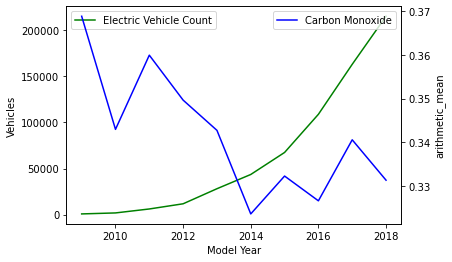

In [42]:
ax = sns.lineplot(x="Model Year", y="Vehicles", color="green", label="Electric Vehicle Count", data=yearly_emmisions_electric.reset_index())
ax_2 = ax.twinx()
sns.lineplot(x="Model Year", y="arithmetic_mean", ax=ax_2, color="blue", label="Carbon Monoxide", data=yearly_emmisions_electric.reset_index())



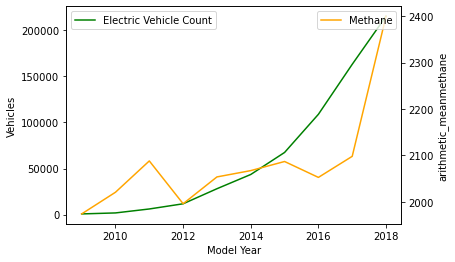

In [47]:
ax = sns.lineplot(x="Model Year", y="Vehicles", color="green",label="Electric Vehicle Count", data=yearly_emmisions_electric.reset_index())
ax_3 = ax.twinx()
sns.lineplot(x="Model Year", y="arithmetic_meanmethane", ax=ax_3, color="orange", label="Methane", data=yearly_emmisions_electric.reset_index())
ax_3.legend(loc="upper right")

In [15]:
yearly_emmisions_electric.corr()

,Vehicles,arithmetic_mean,arithmetic_meanmethane
Vehicles,1.000000,-0.546022,0.809035
arithmetic_mean,-0.546022,1.000000,-0.406216
arithmetic_meanmethane,0.809035,-0.406216,1.000000


In [16]:
yearly_emmisions_gas = vehicle_year_gas.join(carbon_mean, rsuffix='carbon')\
    .join(methane_mean, rsuffix='methane')
yearly_emmisions_gas

,Vehicles,arithmetic_mean,arithmetic_meanmethane
Model Year,,,
2009,733345,0.368803,1973.651797
2010,1560751,0.342977,2020.389881
2011,2458872,0.359915,2087.843476
2012,3564936,0.349654,1995.588721
2013,4900915,0.342753,2053.379150
2014,6284891,0.323675,2066.990588
2015,7961848,0.332318,2086.622332
2016,9712527,0.326665,2052.360898
2017,11562122,0.340594,2097.772138


In [17]:
yearly_emmisions_gas.corr()

,Vehicles,arithmetic_mean,arithmetic_meanmethane
Vehicles,1.000000,-0.703967,0.719081
arithmetic_mean,-0.703967,1.000000,-0.406216
arithmetic_meanmethane,0.719081,-0.406216,1.000000


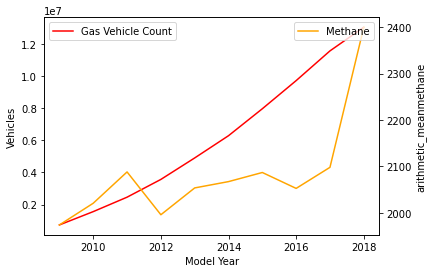

In [52]:
ax_gas= sns.lineplot(x="Model Year", y="Vehicles", color="red", label="Gas Vehicle Count" ,data=yearly_emmisions_gas.reset_index())
ax_gas_2 = ax_gas.twinx()
sns.lineplot(x="Model Year", y="arithmetic_meanmethane", ax=ax_gas_2, color="orange", label="Methane", data=yearly_emmisions_electric.reset_index())
ax_gas_2.legend(loc="upper right")

<AxesSubplot:label='95e25ab3-4a79-4855-b886-ae1fca2668f9', xlabel='Model Year', ylabel='arithmetic_mean'>

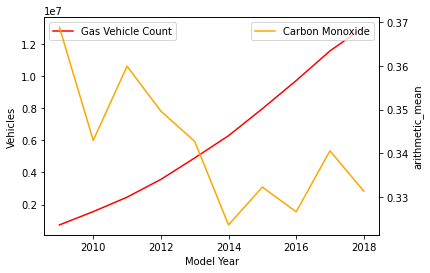

In [37]:
ax_gas= sns.lineplot(x="Model Year", y="Vehicles", color="red", label="Gas Vehicle Count" ,data=yearly_emmisions_gas.reset_index())
ax_gas_2 = ax_gas.twinx()
sns.lineplot(x="Model Year", y="arithmetic_mean", ax=ax_gas_2, color="orange", label="Carbon Monoxide", data=yearly_emmisions_electric.reset_index())

<AxesSubplot:xlabel='Model Year', ylabel='Vehicles'>

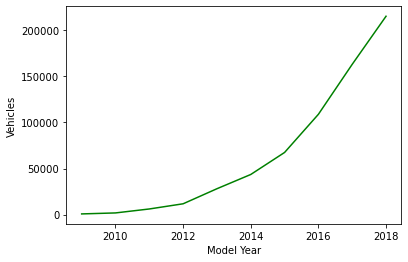

In [30]:
sns.lineplot(data=vehicle_year_electric, x="Model Year", color="green", y="Vehicles")

<AxesSubplot:xlabel='Model Year', ylabel='Vehicles'>

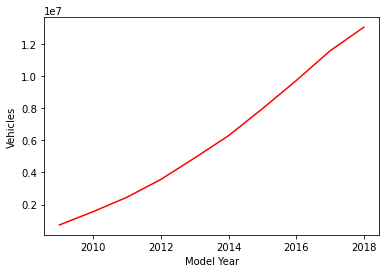

In [31]:
sns.lineplot(data=vehicle_year_gas, x="Model Year", color="red", y="Vehicles")

<AxesSubplot:xlabel='Model Year', ylabel='Vehicles'>

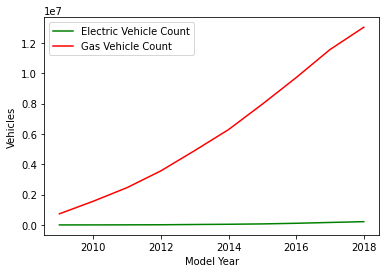

In [35]:
ax_5 = sns.lineplot(data=vehicle_year_electric, x="Model Year", color="green", y="Vehicles", label="Electric Vehicle Count")
sns.lineplot(data=vehicle_year_gas, x="Model Year", color="red", y="Vehicles", ax=ax_5,label="Gas Vehicle Count")